# 06/22 Data Analysis

Data Analysis of the 6/18/23 Trip

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./Data/0620-/CSVLog_20230622_110214.csv',comment="#") 
pd.set_option('display.max_columns', None) #shows all the columns

df = df.loc[:, (df != 0).any(axis=0)] #removes all columns that have only zeros in them
df.drop(index = [0,1,2,3,4,5], inplace=True)  #removes initial rows that don't contain any data
df.reset_index(drop = True, inplace=True)
df.columns = df.columns.str.lstrip(' ') #removes a space char in front of column names

df.head(10)

,Time (sec),Instant fuel economy (MPG),Total fuel economy (MPG),Fuel rate (gal/hr),Instant CO2 rate (lb/mile),Total CO2 (lbs),CO2 flow (lb/min),Engine RPM (RPM),Mass air flow rate (lb/min),Absolute load value (%),Mass air flow rate (lb/min).1,Engine Power (hp),Calculated load value (%),Time since engine start (sec),Ambient air temperature (°F),Intake manifold absolute pressure (inHg),Fuel system 1 status,Trip Distance (miles),Trip Fuel (gal),Trip Fuel Economy (MPG),Trip Duration (min),Ambient Temperature Sensor (°F),Blower Motor Speed Level,Compressor Speed (RPM),Compressor Target Speed (RPM),Room Temperature Sensor (°F),Engine Speed (RPM),Initial Intake Air Temperature (°F),Intake Air (°F),Hybrid battery pack remaining life (%),Boost (psi),Acceleration (ft/s²),Vehicle Speed (MPH),Adjusted Ambient Temperature (°F),Motor Actual Current (A),Motor Power Supply Voltage (V),Battery Voltage (V),Aircon Consumption Power (kW),Battery Block Max Voltage (V),Cooling Fan 0 (%),Status of the Aircon Gate Status / OFF or ON,Battery Voltage (V).1,Engine Torque (lb•ft),Set Temperature (Driver Side) (°F),Solar Sensor (Driver Side),Fuel Input (gal),Vehicle Load (%),Calculate Load (%)
0,5.452,26.67189,38.48528,0.000000,0.734700,0.0000,0.000000,2006.25,2.385369,49.80392,2.734296,0.00000,95.29412,155,82.4,0.00000,2,0.000000,0.000000,0.00000,0.000000,83.3,18,2927,2951,85.55,1985.75,82.625,84.2,52.15686,-2.900755,0.000000,41.35847,81.968,-0.88,27.048,14.414,0.80,15.35889,0.0,1,14.3,0.00000,92.3,49,6.604301,50.19608,94.90196
1,6.450,26.67189,38.48528,0.000000,0.734700,0.0000,0.000000,2006.25,2.385369,49.80392,2.734296,0.00000,95.29412,155,82.4,0.00000,2,0.000000,0.000000,0.00000,0.000000,83.3,18,2927,2951,85.55,1985.75,82.625,84.2,52.15686,-2.900755,0.000000,41.35847,81.968,-0.88,27.048,14.414,0.80,15.35889,0.0,1,14.3,0.00000,92.3,49,6.604301,50.19608,94.90196
2,7.442,26.67189,38.48528,0.000000,0.734700,0.0000,0.000000,2006.25,2.385369,49.80392,2.734296,0.00000,95.29412,155,82.4,0.00000,2,0.000000,0.000000,0.00000,0.000000,83.3,18,2927,2951,85.55,1985.75,82.625,84.2,52.15686,-2.900755,0.000000,41.35847,81.968,-0.88,27.048,14.414,0.80,15.35889,0.0,1,14.3,0.00000,92.3,49,6.604301,50.19608,94.90196
3,8.449,25.98428,38.48252,1.602195,0.754142,172.7092,0.523272,2007.75,2.343033,49.80392,2.654835,21.96787,94.50980,155,82.4,20.86510,2,0.050388,0.001943,25.93177,0.130570,83.3,18,2954,2974,85.55,2032.00,82.625,84.2,52.15686,-1.305340,-0.104581,42.15382,81.968,-0.32,27.097,14.414,0.80,15.43945,0.0,1,14.3,57.46618,92.3,49,6.736387,48.23529,94.50980
4,9.447,25.98428,38.48252,1.602195,0.754142,172.7092,0.523272,2007.75,2.343033,49.80392,2.654835,21.96787,94.50980,155,82.4,20.86510,2,0.050388,0.001943,25.93177,0.130570,83.3,18,2954,2974,85.55,2032.00,82.625,84.2,52.15686,-1.305340,-0.104581,42.15382,81.968,-0.32,27.097,14.414,0.80,15.43945,0.0,1,14.3,57.46618,92.3,49,6.736387,48.23529,94.50980
5,10.455,25.98428,38.48252,1.602195,0.754142,172.7092,0.523272,2007.75,2.343033,49.80392,2.654835,21.96787,94.50980,155,82.4,20.86510,2,0.050388,0.001943,25.93177,0.130570,83.3,18,2954,2974,85.55,2032.00,82.625,84.2,52.15686,-1.305340,-0.104581,42.15382,81.968,-0.32,27.097,14.414,0.80,15.43945,0.0,1,14.3,57.46618,92.3,49,6.736387,48.23529,94.50980
6,11.476,25.99662,38.48045,1.649238,0.753784,172.7382,0.538637,2044.50,2.411829,50.19608,2.703429,22.61289,94.90196,155,82.4,21.46169,2,0.088928,0.003419,26.01362,0.183582,83.3,18,2976,2989,85.55,2045.25,82.625,84.2,52.15686,-1.305340,0.177039,42.94918,81.968,0.09,27.048,14.433,0.85,15.43945,0.0,1,14.3,58.09021,92.3,48,6.604301,49.80392,94.50980
7,12.448,25.99662,38.48045,1.649238,0.753784,172.7382,0.538637,2044.50,2.411829,50.19608,2.703429,22.61289,94.90196,155,82.4,21.46169,2,0.088928,0.003419,26.01362,0.183582,83.3,18,2976,2989,85.55,2045.25,82.625,84.2,52.15686,-1.305340,0.177039,42.94918,81.968,0.09,27.048,14.433,0.85,15.43945,0.0,1,14.3,58.09021,92.3,48,6.604301,49.80392,94.50980
8,13.462,25.99662,38.48045,1.649238,0.753784,1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12269 entries, 0 to 12268
Data columns (total 48 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Time (sec)                                    12269 non-null  float64
 1   Instant fuel economy (MPG)                    12269 non-null  float64
 2   Total fuel economy (MPG)                      12269 non-null  float64
 3   Fuel rate (gal/hr)                            12269 non-null  float64
 4   Instant CO2 rate (lb/mile)                    12269 non-null  float64
 5   Total CO2 (lbs)                               12269 non-null  float64
 6   CO2 flow (lb/min)                             12269 non-null  float64
 7   Engine RPM (RPM)                              12269 non-null  float64
 8   Mass air flow rate (lb/min)                   12269 non-null  float64
 9   Absolute load value (%)                       12269 non-null 

In [4]:
df.describe()

,Time (sec),Instant fuel economy (MPG),Total fuel economy (MPG),Fuel rate (gal/hr),Instant CO2 rate (lb/mile),Total CO2 (lbs),CO2 flow (lb/min),Engine RPM (RPM),Mass air flow rate (lb/min),Absolute load value (%),Mass air flow rate (lb/min).1,Engine Power (hp),Calculated load value (%),Time since engine start (sec),Ambient air temperature (°F),Intake manifold absolute pressure (inHg),Fuel system 1 status,Trip Distance (miles),Trip Fuel (gal),Trip Fuel Economy (MPG),Trip Duration (min),Ambient Temperature Sensor (°F),Blower Motor Speed Level,Compressor Speed (RPM),Compressor Target Speed (RPM),Room Temperature Sensor (°F),Engine Speed (RPM),Initial Intake Air Temperature (°F),Intake Air (°F),Hybrid battery pack remaining life (%),Boost (psi),Acceleration (ft/s²),Vehicle Speed (MPH),Adjusted Ambient Temperature (°F),Motor Actual Current (A),Motor Power Supply Voltage (V),Battery Voltage (V),Aircon Consumption Power (kW),Battery Block Max Voltage (V),Cooling Fan 0 (%),Status of the Aircon Gate Status / OFF or ON,Battery Voltage (V).1,Engine Torque (lb•ft),Set Temperature (Driver Side) (°F),Solar Sensor (Driver Side),Fuel Input (gal),Vehicle Load (%),Calculate Load (%)
count,12269.000000,12269.000000,12269.000000,12269.000000,12269.000000,12269.000000,12269.000000,12269.000000,12269.000000,12269.000000,12269.000000,12269.000000,12269.000000,12269.000000,12269.000000,12269.000000,12269.000000,12269.000000,12269.000000,12269.000000,12269.000000,12269.000000,12269.000000,12269.000000,12269.000000,12269.000000,12269.000000,12269.000000,12269.000000,12269.000000,12269.000000,1.226900e+04,12269.000000,12269.000000,12269.000000,12269.000000,12269.000000,12269.000000,12269.000000,12269.000000,12269.000000,12269.000000,12269.000000,1.226900e+04,12269.000000,12269.000000,12269.000000,12269.000000
mean,6171.763199,177.579950,38.964614,1.173971,0.439838,218.155393,0.383416,1714.215992,1.746025,29.907035,2.230215,16.096453,63.609448,4801.759068,77.294596,13.622155,1.970576,95.219844,2.323671,40.455057,102.815790,78.159151,6.978075,1682.194311,1693.475263,77.143190,1725.417760,86.400063,93.782444,63.848661,-2.389275,6.347188e-03,48.780376,77.178078,-0.052799,27.063592,13.857269,0.430989,16.270017,51.719211,0.996984,13.745521,34.118987,9.230000e+01,42.437770,4.549351,30.069217,63.999400
std,3581.370530,359.393332,0.426736,1.071355,0.505418,24.502461,0.349902,1271.026194,1.587022,20.108717,1.878387,14.689468,37.727010,3332.341661,2.973543,17.191211,0.812980,52.367009,1.238956,2.911094,59.691539,3.007183,3.666652,437.763979,426.921259,1.798604,1278.565706,10.223667,8.439579,4.362622,2.946005,1.126226e+00,25.593968,2.993161,1.804792,0.278014,0.370075,0.121828,0.795983,30.778557,0.054835,0.335526,22.818070,2.120346e-11,4.659744,2.515670,19.996602,37.560767
min,5.452000,0.000000,38.016910,0.000000,0.000000,0.000000,0.000000,0.000000,0.027783,0.000000,0.000000,0.000000,0.000000,0.000000,71.600000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,72.590000,0.000000,0.000000,0.000000,74.300000,0.000000,82.625000,80.600000,52.156860,-11.457980,-6.667112e+00,0.000000,72.176000,-41.810000,17.591000,12.988000,0.000000,13.018800,0.000000,0.000000,13.400000,0.000000,9.230000e+01,2.000000,0.000000,0.000000,0.000000
25%,3076.432000,25.521070,38.667300,0.205366,0.082641,199.759400,0.067072,977.250000,0.306936,11.372550,0.470508,2.815791,39.215690,1642.000000,75.200000,0.554735,2.000000,49.403230,1.382584,39.622380,51.268080,76.370000,5.000000,1520.000000,1522.000000,76.100000,980.250000,82.625000,87.800000,60.392160,-2.465641,-2.414432e-01,30.223500,75.056000,-0.150000,27.048000,13.574000,0.350000,15.778810,40.000000,1.000000,13.500000,13.232750,9.230000e+01,42.000000,2.905892,11.372550,40.000000
50%,6144.375000,45.352660,39.009870,0.971946,0.326864,224.467500,0.317435,1652.250000,1.452654,38.431370,2.070820,13.326460,87.450980,4656.000000,77.000000,13.268650,2.000000,107.939300,2.643686,41.221260,102.350000,77.630000,5.000000,1599.000000,1603.000000,77.0000

In [5]:
df['Aircon Consumption Power (kW)'].describe()

count    12269.000000
mean         0.430989
std          0.121828
min          0.000000
25%          0.350000
50%          0.400000
75%          0.500000
max          1.150000
Name: Aircon Consumption Power (kW), dtype: float64

In [6]:
df[(df['Aircon Consumption Power (kW)'] > 0) & (df['Compressor Speed (RPM)'] == 0)].head() 
#where ac was consuming power but compressor was off

,Time (sec),Instant fuel economy (MPG),Total fuel economy (MPG),Fuel rate (gal/hr),Instant CO2 rate (lb/mile),Total CO2 (lbs),CO2 flow (lb/min),Engine RPM (RPM),Mass air flow rate (lb/min),Absolute load value (%),Mass air flow rate (lb/min).1,Engine Power (hp),Calculated load value (%),Time since engine start (sec),Ambient air temperature (°F),Intake manifold absolute pressure (inHg),Fuel system 1 status,Trip Distance (miles),Trip Fuel (gal),Trip Fuel Economy (MPG),Trip Duration (min),Ambient Temperature Sensor (°F),Blower Motor Speed Level,Compressor Speed (RPM),Compressor Target Speed (RPM),Room Temperature Sensor (°F),Engine Speed (RPM),Initial Intake Air Temperature (°F),Intake Air (°F),Hybrid battery pack remaining life (%),Boost (psi),Acceleration (ft/s²),Vehicle Speed (MPH),Adjusted Ambient Temperature (°F),Motor Actual Current (A),Motor Power Supply Voltage (V),Battery Voltage (V),Aircon Consumption Power (kW),Battery Block Max Voltage (V),Cooling Fan 0 (%),Status of the Aircon Gate Status / OFF or ON,Battery Voltage (V).1,Engine Torque (lb•ft),Set Temperature (Driver Side) (°F),Solar Sensor (Driver Side),Fuel Input (gal),Vehicle Load (%),Calculate Load (%)
508,517.452,436.6554,38.40328,0.018499,0.044877,175.7267,0.006042,0.0,0.027783,0.0,0.0,0.253646,0.0,640,80.6,0.0,4,5.266456,0.155954,33.7692,8.619469,82.04,13,0,2201,81.05,3315.5,82.625,91.4,65.88235,-0.145038,-3.7784,22.26994,81.392,0.03,27.048,14.433,0.6,16.94946,0.0,1,14.3,0.0,92.3,41,5.811785,57.2549,95.29412
509,518.450,436.6554,38.40328,0.018499,0.044877,175.7267,0.006042,0.0,0.027783,0.0,0.0,0.253646,0.0,640,80.6,0.0,4,5.266456,0.155954,33.7692,8.619469,82.04,13,0,2201,81.05,3315.5,82.625,91.4,65.88235,-0.145038,-3.7784,22.26994,81.392,0.03,27.048,14.433,0.6,16.94946,0.0,1,14.3,0.0,92.3,41,5.811785,57.2549,95.29412
510,519.452,436.6554,38.40328,0.018499,0.044877,175.7267,0.006042,0.0,0.027783,0.0,0.0,0.253646,0.0,640,80.6,0.0,4,5.266456,0.155954,33.7692,8.619469,82.04,13,0,2201,81.05,3315.5,82.625,91.4,65.88235,-0.145038,-3.7784,22.26994,81.392,0.03,27.048,14.433,0.6,16.94946,0.0,1,14.3,0.0,92.3,41,5.811785,57.2549,95.29412
511,520.452,436.6554,38.40328,0.018499,0.044877,175.7267,0.006042,0.0,0.027783,0.0,0.0,0.253646,0.0,640,80.6,0.0,4,5.266456,0.155954,33.7692,8.619469,82.04,13,0,2201,81.05,3315.5,82.625,91.4,65.88235,-0.145038,-3.7784,22.26994,81.392,0.03,27.048,14.433,0.6,16.94946,0.0,1,14.3,0.0,92.3,41,5.811785,57.2549,95.29412
512,521.454,436.6554,38.40328,0.018499,0.044877,175.7267,0.006042,0.0,0.027783,0.0,0.0,0.253646,0.0,640,80.6,0.0,4,5.266456,0.155954,33.7692,8.619469,82.04,13,0,2201,81.05,3315.5,82.625,91.4,65.88235,-0.145038,-3.7784,22.26994,81.392,0.03,27.048,14.433,0.6,16.94946,0.0,1,14.3,0.0,92.3,41,5.811785,57.2549,95.29412


In [7]:
ac_df = df[['Time (sec)', 'Engine RPM (RPM)', 'Compressor Speed (RPM)',
           'Compressor Target Speed (RPM)','Ambient Temperature Sensor (°F)',
           'Room Temperature Sensor (°F)','Aircon Consumption Power (kW)',
           'Hybrid battery pack remaining life (%)']]
ac_df[10:13]

,Time (sec),Engine RPM (RPM),Compressor Speed (RPM),Compressor Target Speed (RPM),Ambient Temperature Sensor (°F),Room Temperature Sensor (°F),Aircon Consumption Power (kW),Hybrid battery pack remaining life (%)
10,15.447,2072.5,2991,3002,83.3,85.55,0.85,52.15686
11,16.435,2072.5,2991,3002,83.3,85.55,0.85,52.15686
12,17.438,2072.5,2991,3002,83.3,85.55,0.85,52.15686


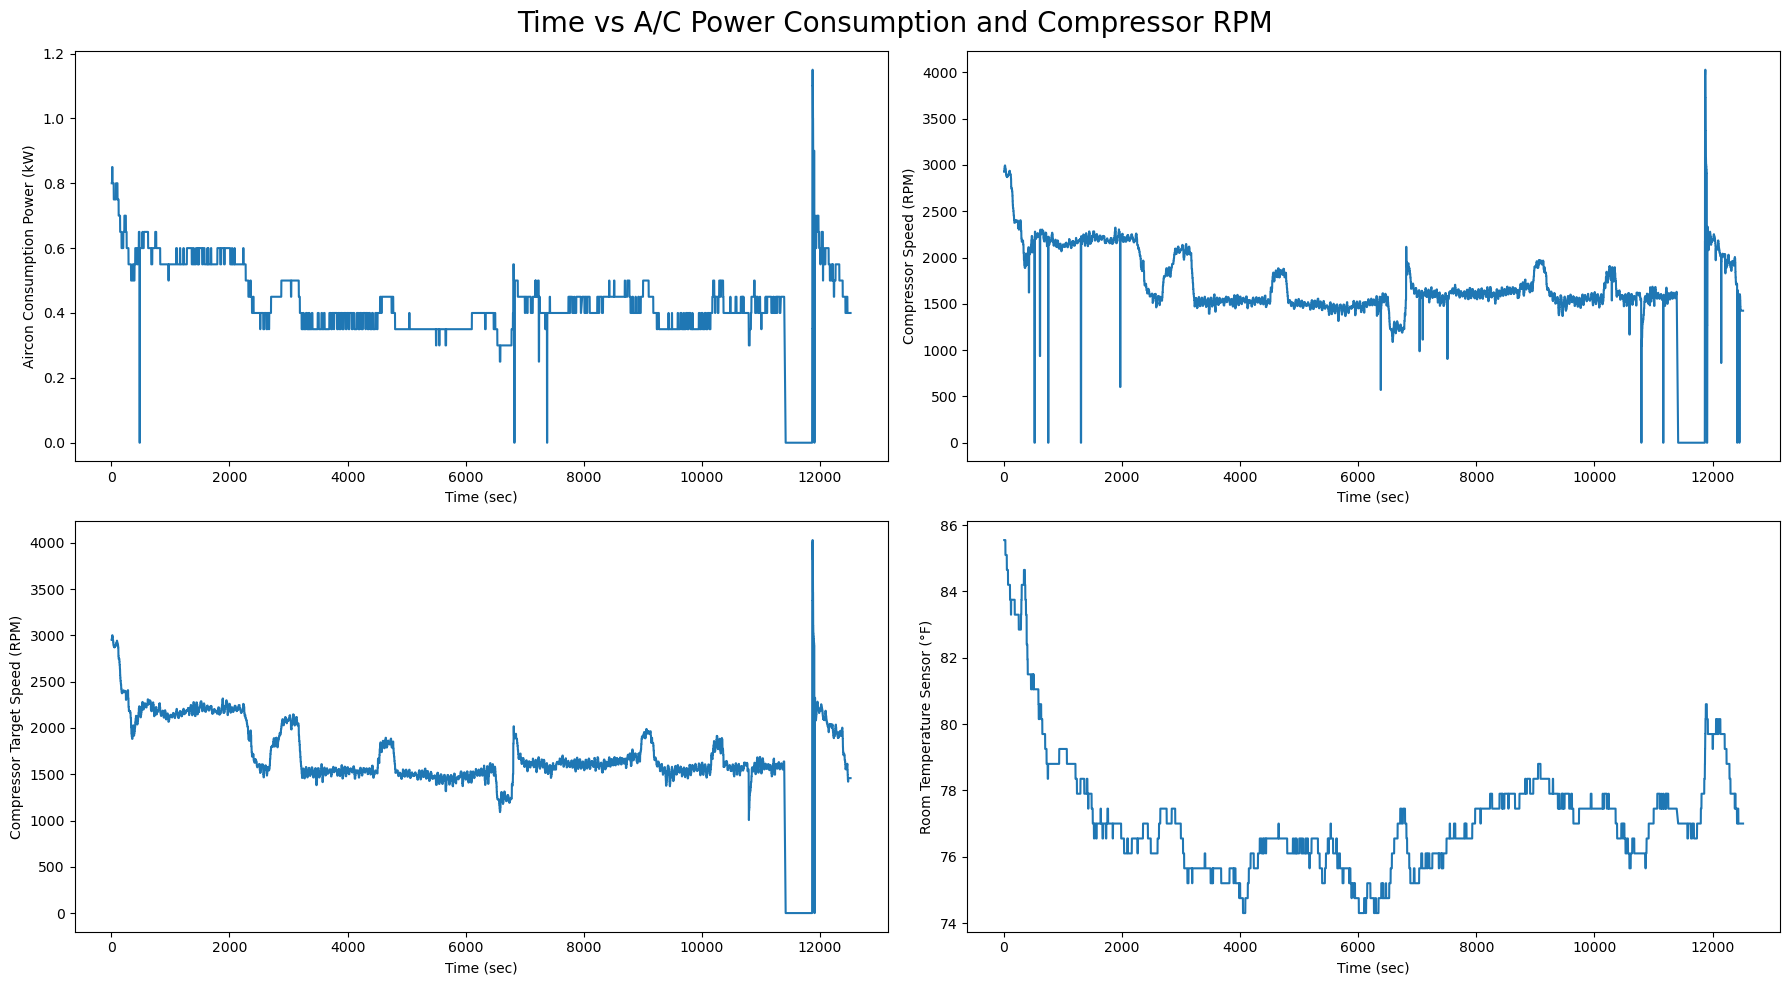

In [8]:
fig, axes = plt.subplots(2, 2, figsize = (18, 10), tight_layout = True)
axes[0,0].plot(ac_df[['Time (sec)']], ac_df[['Aircon Consumption Power (kW)']])
axes[0,0].set(ylabel='Aircon Consumption Power (kW)')

axes[0,1].plot(ac_df[['Time (sec)']], ac_df[['Compressor Speed (RPM)']])
axes[0,1].set(ylabel='Compressor Speed (RPM)')

axes[1,0].plot(ac_df[['Time (sec)']], ac_df[['Compressor Target Speed (RPM)']])
axes[1,0].set(ylabel='Compressor Target Speed (RPM)')

axes[1,1].plot(ac_df[['Time (sec)']], ac_df[['Room Temperature Sensor (°F)']])
axes[1,1].set(ylabel='Room Temperature Sensor (°F)')

fig.suptitle('Time vs A/C Power Consumption and Compressor RPM', fontsize = 20)
for ax in axes.flat:
    ax.set(xlabel='Time (sec)')


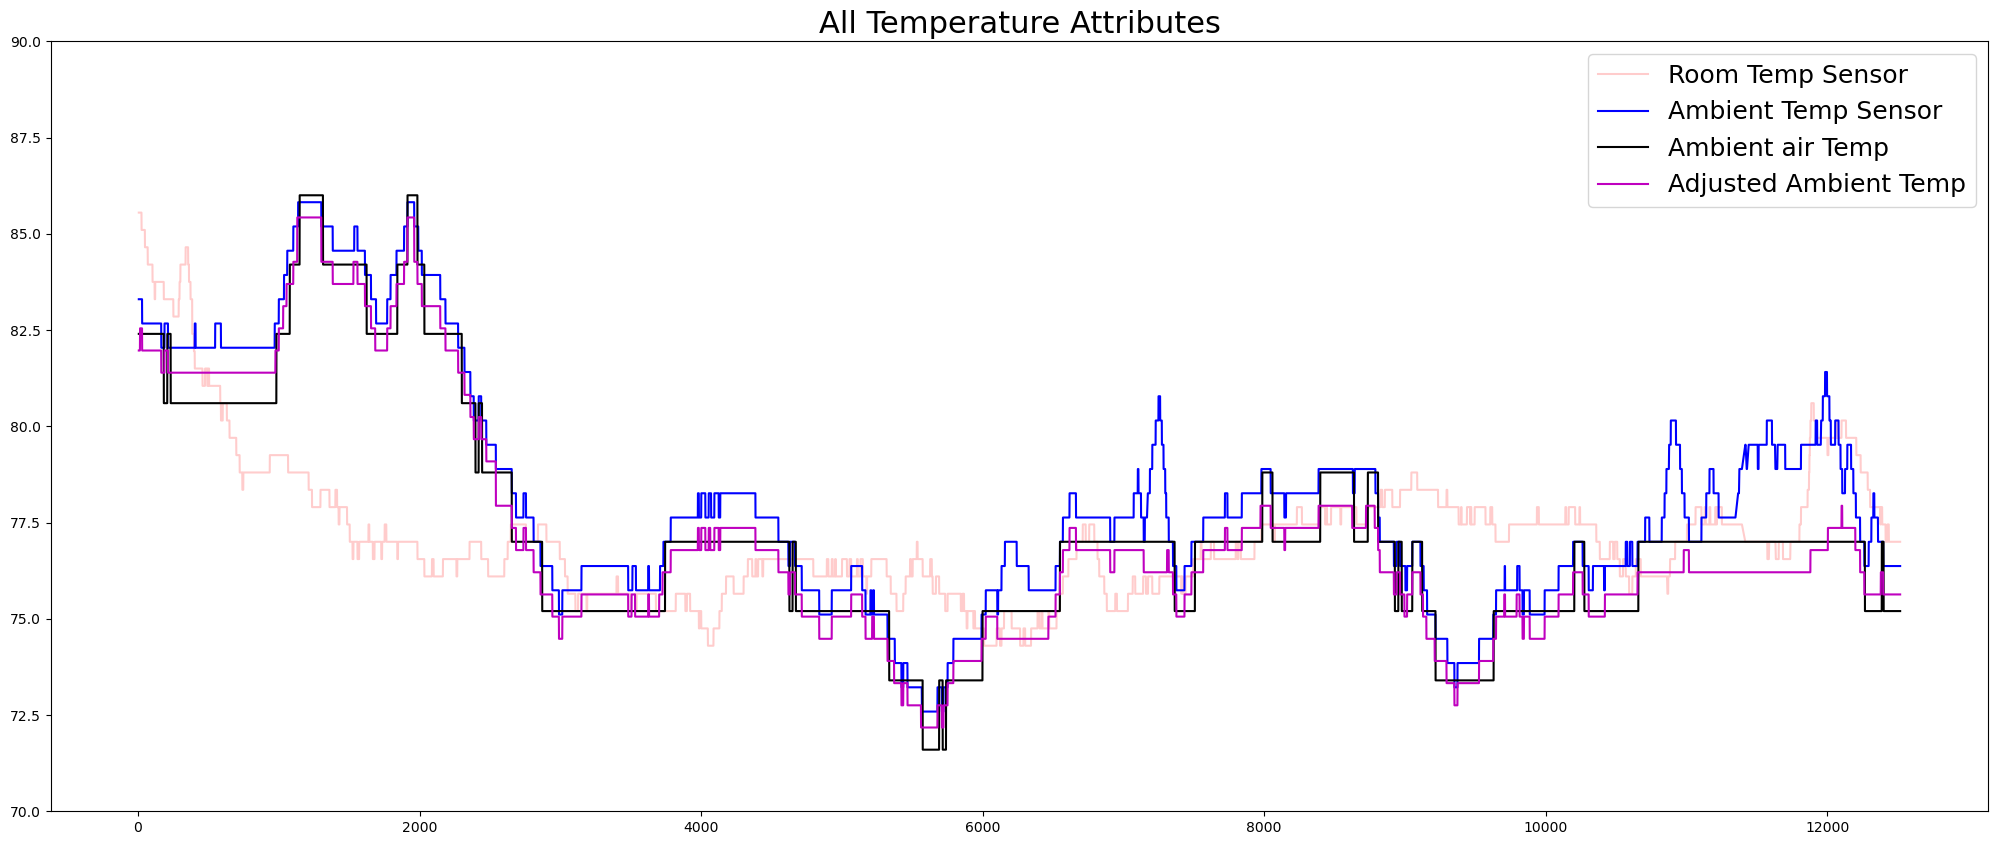

In [9]:
plt_1 = plt.figure(figsize=(25, 10))
plt.plot(df[['Time (sec)']], df[['Room Temperature Sensor (°F)']], alpha=0.2, color='r', label='Room Temp Sensor')
plt.plot(df[['Time (sec)']], df[['Ambient Temperature Sensor (°F)']], color='b', label='Ambient Temp Sensor')
plt.plot(df[['Time (sec)']], df[['Ambient air temperature (°F)']], color='k', label='Ambient air Temp')
plt.plot(df[['Time (sec)']], df[['Adjusted Ambient Temperature (°F)']], color='m', label='Adjusted Ambient Temp')
plt.ylim(70,90)
plt.title('All Temperature Attributes', fontsize='22')
plt.legend(fontsize=18)
plt.show()
#plt_1.savefig("temps.png", bbox_inches='tight') 

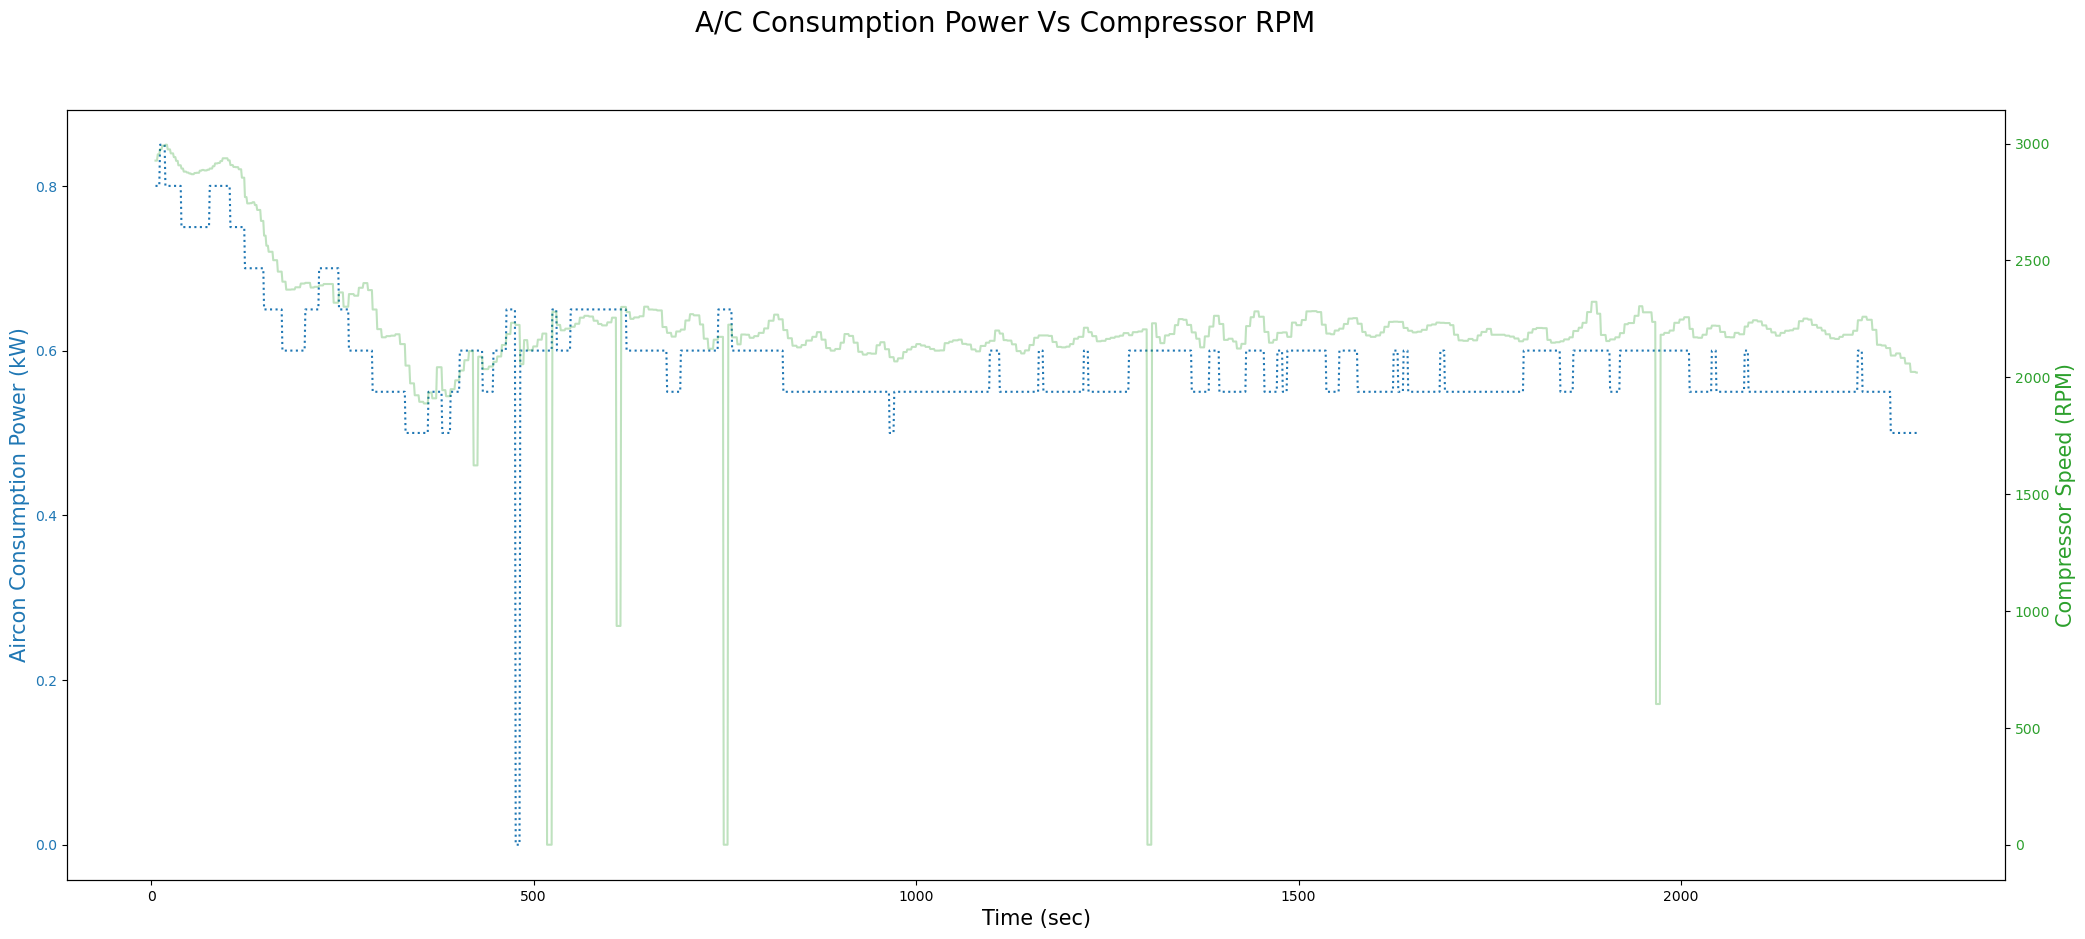

In [10]:
fig, ax1 = plt.subplots(figsize = (25, 10))
  
color = 'tab:blue'
ax1.set_xlabel('Time (sec)', fontsize = 15)
ax1.set_ylabel('Aircon Consumption Power (kW)', color = color, fontsize = 15)
ax1.plot(ac_df[['Time (sec)']][:2300], ac_df[['Aircon Consumption Power (kW)']][:2300], color = color, linestyle = ':')
ax1.tick_params(axis ='y', labelcolor = color)
  
ax2 = ax1.twinx()
  
color = 'tab:green'
ax2.set_ylabel('Compressor Speed (RPM)', color = color, fontsize = 15)
ax2.plot(ac_df[['Time (sec)']][:2300], ac_df[['Compressor Speed (RPM)']][:2300], color = color, alpha=0.3) #alpha=opacity
ax2.tick_params(axis ='y', labelcolor = color)
  
fig.suptitle('A/C Consumption Power Vs Compressor RPM', fontsize = 20)

plt.show()

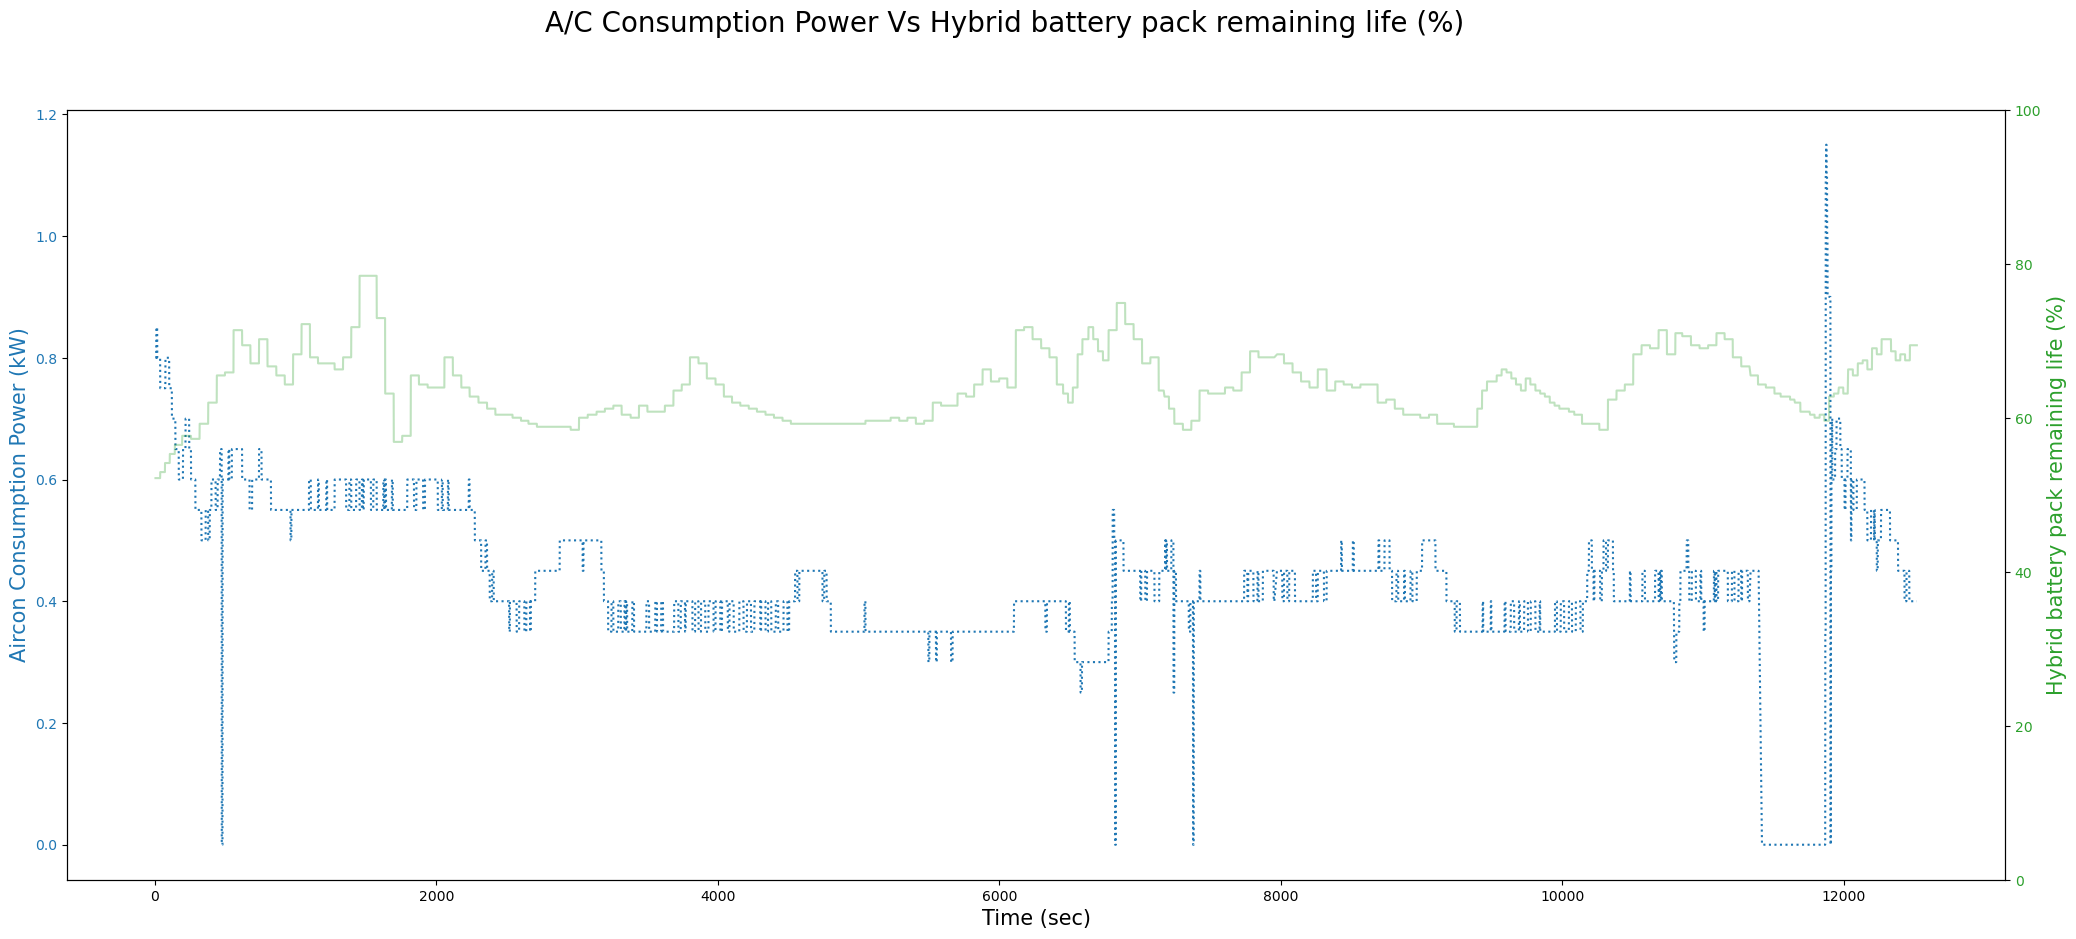

In [11]:
fig, ax1 = plt.subplots(figsize = (25, 10))
  
color = 'tab:blue'
ax1.set_xlabel('Time (sec)', fontsize = 15)
ax1.set_ylabel('Aircon Consumption Power (kW)', color = color, fontsize = 15)
ax1.plot(df[['Time (sec)']][:12300], df[['Aircon Consumption Power (kW)']][:12300], color = color, linestyle = ':')
ax1.tick_params(axis ='y', labelcolor = color)
  
ax2 = ax1.twinx()
  
color = 'tab:green'
ax2.set_ylabel('Hybrid battery pack remaining life (%)', color = color, fontsize = 15)
ax2.plot(df[['Time (sec)']][:12300], df[['Hybrid battery pack remaining life (%)']][:12300], color = color, alpha=0.3) #alpha=opacity
ax2.set_ylim(0,100)
ax2.tick_params(axis ='y', labelcolor = color)
  
fig.suptitle('A/C Consumption Power Vs Hybrid battery pack remaining life (%)', fontsize = 20)

plt.show()


<Axes: >

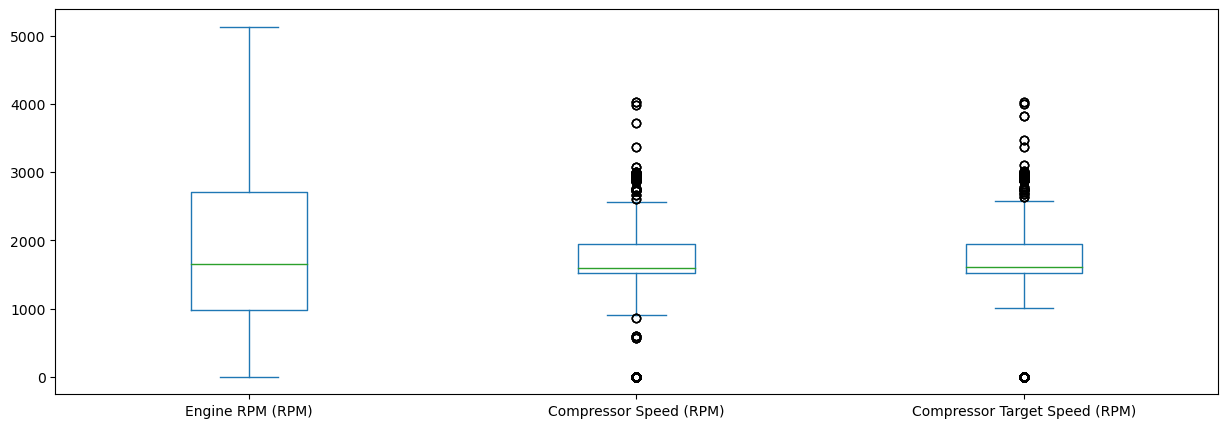

In [12]:
df[['Engine RPM (RPM)', 'Compressor Speed (RPM)', 'Compressor Target Speed (RPM)']].plot(kind = 'box', figsize = (15, 5))

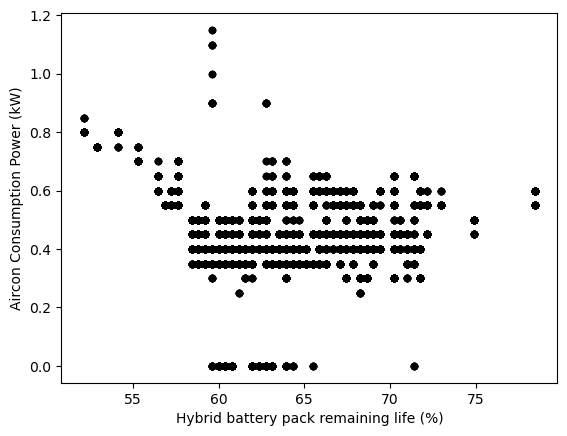

In [13]:
df.plot(x='Hybrid battery pack remaining life (%)', y='Aircon Consumption Power (kW)', kind='scatter', color='k');

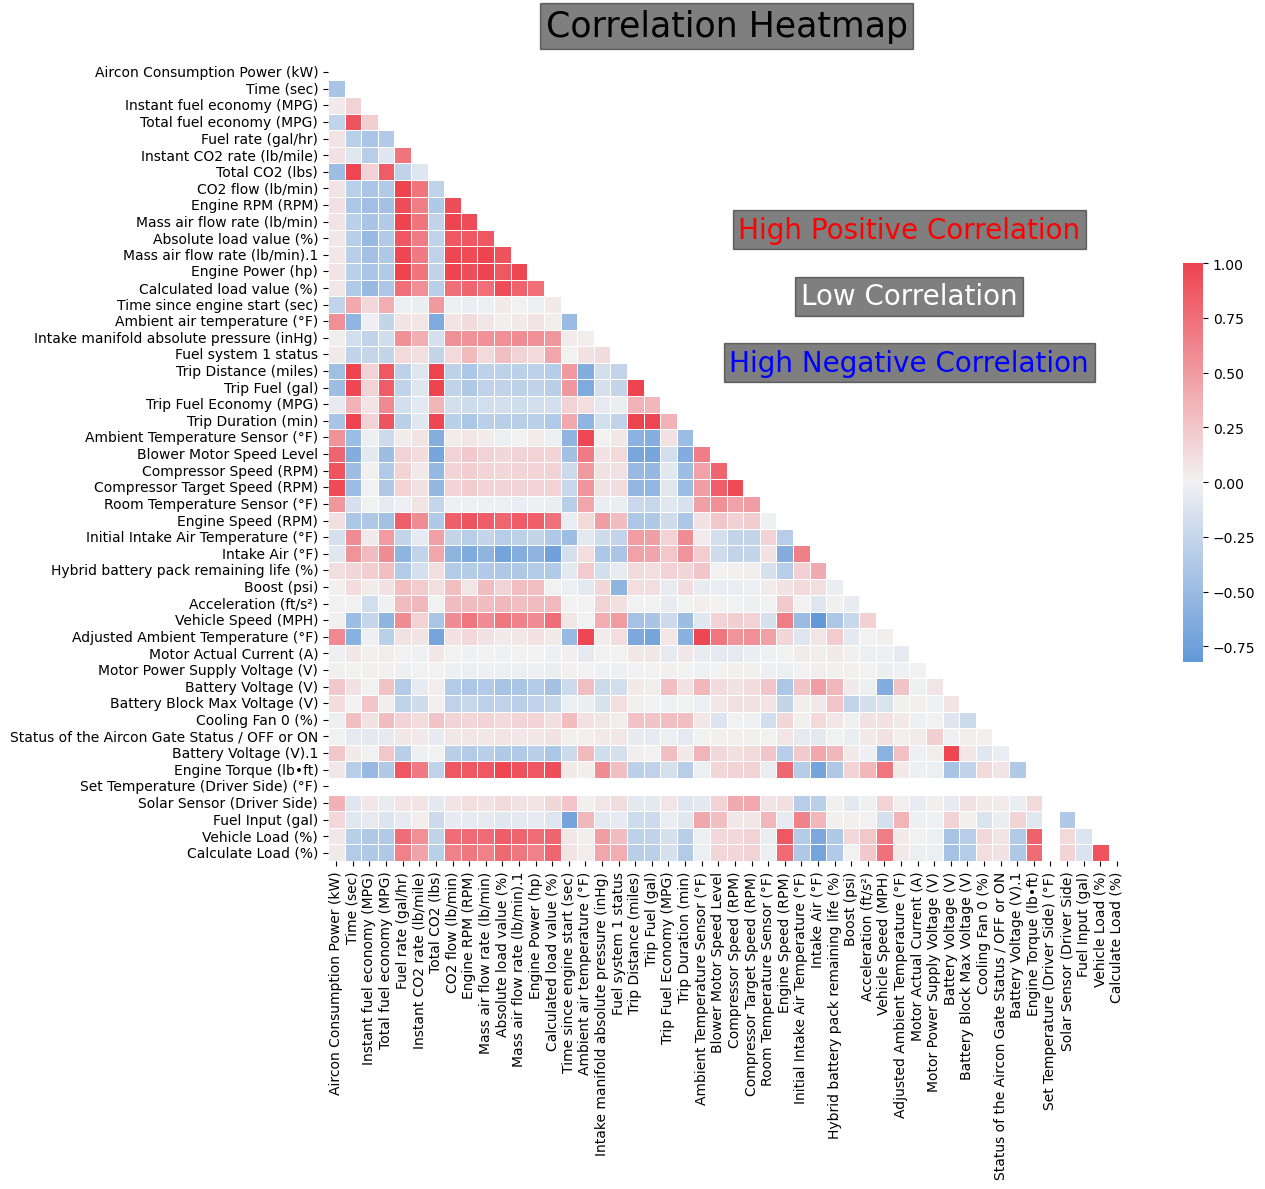

In [14]:
# correlation heatmap #recursive feature elimation
df = df.loc[:, (df != 0).any(axis=0)] # removes all columns that only has zeros in them
df = df[['Aircon Consumption Power (kW)'] + [col for col in df.columns if col != 'Aircon Consumption Power (kW)']]

# Compute the correlation matrix
corr = df.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Generate a custom diverging colormap (blue to red)
cmap = sns.diverging_palette(250, 10, s=80, l=55, as_cmap=True)
# Draw the heatmap with correct aspect ratio
sns.heatmap(corr, cmap=cmap, mask = mask, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False)

# Add legend indicators
plt.text(35, 10, "High Positive Correlation", ha='center', va='center', color='r', fontsize=20,
         bbox=dict(facecolor='black', alpha=0.5))
plt.text(35, 14, "Low Correlation", ha='center', va='center', color='white', fontsize=20,
         bbox=dict(facecolor='black', alpha=0.5))
plt.text(35, 18, "High Negative Correlation", ha='center', va='center', color='blue', fontsize=20,
         bbox=dict(facecolor='black', alpha=0.5))
# Add title with background
plt.title('Correlation Heatmap', fontsize=25, pad=20,
          bbox=dict(facecolor='black', alpha=0.5))
plt.tight_layout()
plt.show()

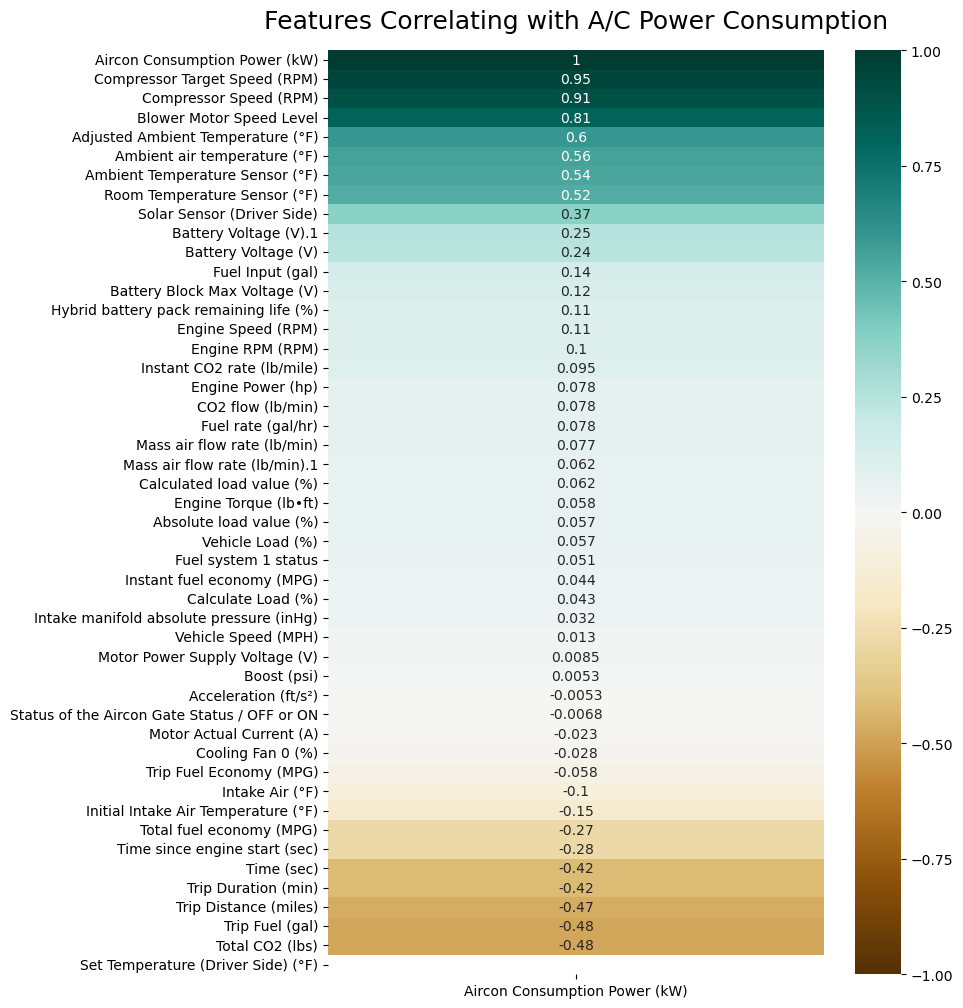

In [15]:
ac_corr = df.corr()[['Aircon Consumption Power (kW)']].sort_values(by='Aircon Consumption Power (kW)', ascending=False)

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(ac_corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with A/C Power Consumption', fontsize = 18, pad=16);